# DIABETES PREDICTION MODEL

### IMPORTING ALL IMPORTANT LIBRARIES

In [40]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import sklearn.datasets
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

## Data collection and Analysis

# PIMA DIABETES DATASET


In [41]:
#loading the diabetes dataset to a pandas dataframe
#reading the data  and storing in dataframe
diabetes_dataset = pd.read_csv('diabetes.csv')

#displaying 5 rows of data 
# diabetes_dataset.head()

diabetes_dataset.__len__() # rows only 

diabetes_dataset.shape # for both rows and columns

# 9th column is label / outcome / target


(768, 9)

In [42]:
diabetes_dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)


In [43]:
def median_target(var):   
    temp = diabetes_dataset[diabetes_dataset[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [44]:
median_target('Insulin')


,Outcome,Insulin
0,0,102.5
1,1,169.5


In [45]:
median_target('Glucose')


,Outcome,Glucose
0,0,107.0
1,1,140.0


In [46]:
median_target('SkinThickness')


,Outcome,SkinThickness
0,0,27.0
1,1,32.0


In [47]:
median_target('BloodPressure')


,Outcome,BloodPressure
0,0,70.0
1,1,74.5


In [48]:
median_target('BMI')


,Outcome,BMI
0,0,30.1
1,1,34.3


In [49]:
diabetes_dataset.loc[(diabetes_dataset['Outcome'] == 0 ) & (diabetes_dataset['Glucose'].isnull()), 'Glucose'] = 107
diabetes_dataset.loc[(diabetes_dataset['Outcome'] == 1 ) & (diabetes_dataset['Glucose'].isnull()), 'Glucose'] = 140

diabetes_dataset.loc[(diabetes_dataset['Outcome'] == 0 ) & (diabetes_dataset['Insulin'].isnull()), 'Insulin'] = 102.5
diabetes_dataset.loc[(diabetes_dataset['Outcome'] == 1 ) & (diabetes_dataset['Insulin'].isnull()), 'Insulin'] = 169.5


diabetes_dataset.loc[(diabetes_dataset['Outcome'] == 0 ) & (diabetes_dataset['SkinThickness'].isnull()), 'SkinThickness'] = 27
diabetes_dataset.loc[(diabetes_dataset['Outcome'] == 1 ) & (diabetes_dataset['SkinThickness'].isnull()), 'SkinThickness'] = 32

diabetes_dataset.loc[(diabetes_dataset['Outcome'] == 0 ) & (diabetes_dataset['BloodPressure'].isnull()), 'BloodPressure'] = 70
diabetes_dataset.loc[(diabetes_dataset['Outcome'] == 1 ) & (diabetes_dataset['BloodPressure'].isnull()), 'BloodPressure'] = 74.5

diabetes_dataset.loc[(diabetes_dataset['Outcome'] == 0 ) & (diabetes_dataset['BMI'].isnull()), 'BMI'] = 30.1
diabetes_dataset.loc[(diabetes_dataset['Outcome'] == 1 ) & (diabetes_dataset['BMI'].isnull()), 'BMI'] = 34.3

In [50]:
# getting the stastical measures of data

diabetes_dataset.describe()   # gives count mean std  quantiles max 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.677083,72.389323,29.089844,141.753906,32.434635,0.471876,33.240885,0.348958
std,3.369578,30.464161,12.106039,8.890820,89.100847,6.880498,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,102.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,102.500000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,169.500000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [51]:
diabetes_dataset['Outcome'].value_counts()
# 1 means person -> diabetic 
# 0 means person -> non diabetic

Outcome
0    500
1    268
Name: count, dtype: int64

In [52]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.622000,70.844000,27.170000,117.172000,30.846000,0.429734,31.190000
1,4.865672,142.302239,75.272388,32.671642,187.615672,35.398507,0.550500,37.067164


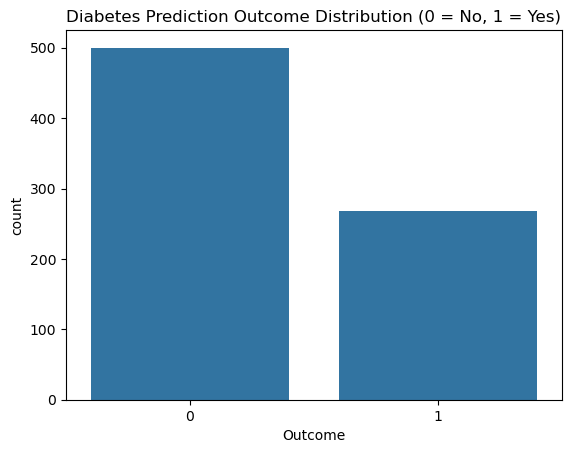

In [53]:
sns.countplot(x='Outcome', data=diabetes_dataset)
plt.title("Diabetes Prediction Outcome Distribution (0 = No, 1 = Yes)")
plt.show()

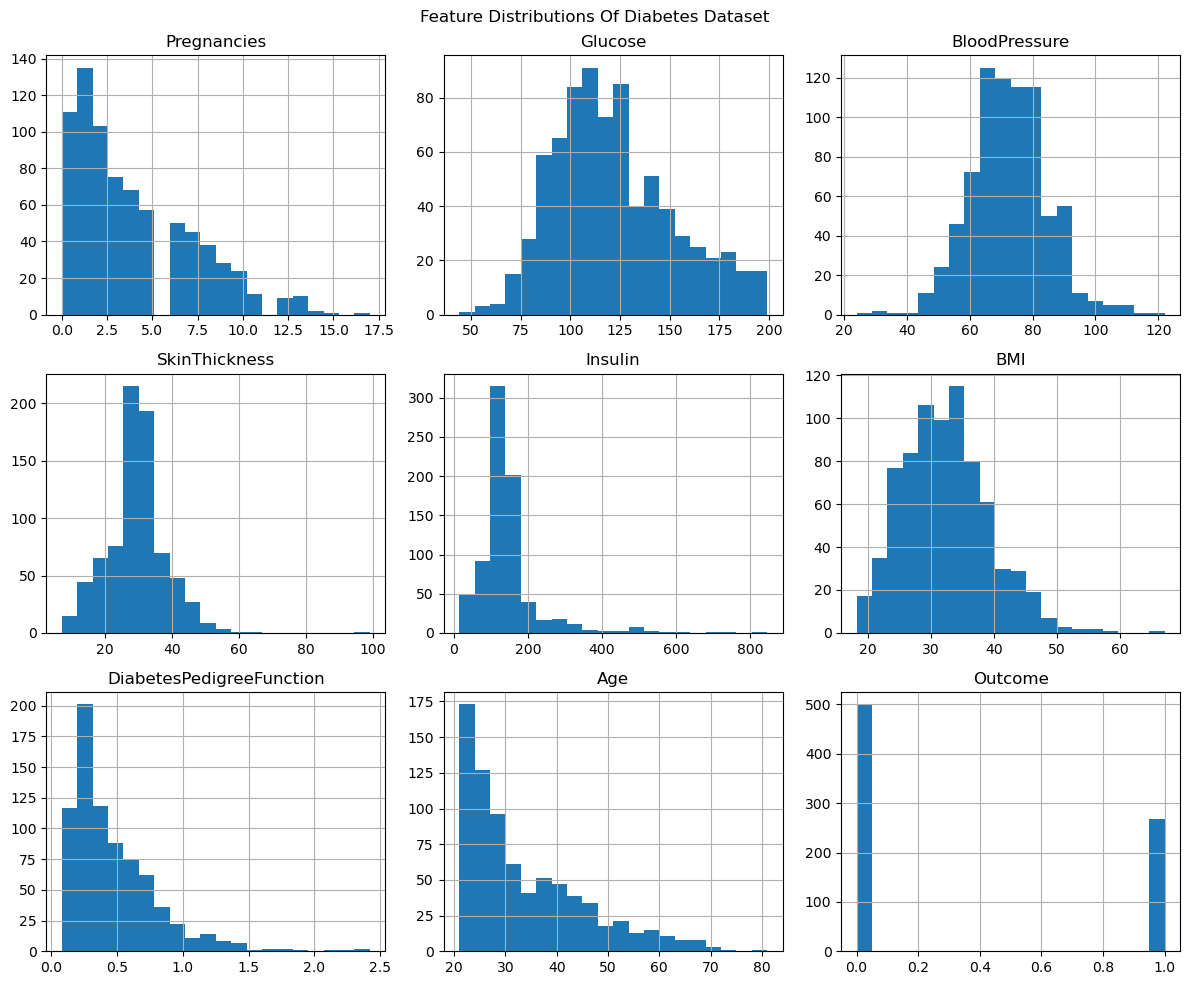

In [78]:
diabetes_dataset.hist(figsize=(12, 10), bins=20)
plt.suptitle("Feature Distributions Of Diabetes Dataset")
plt.tight_layout()
plt.show()


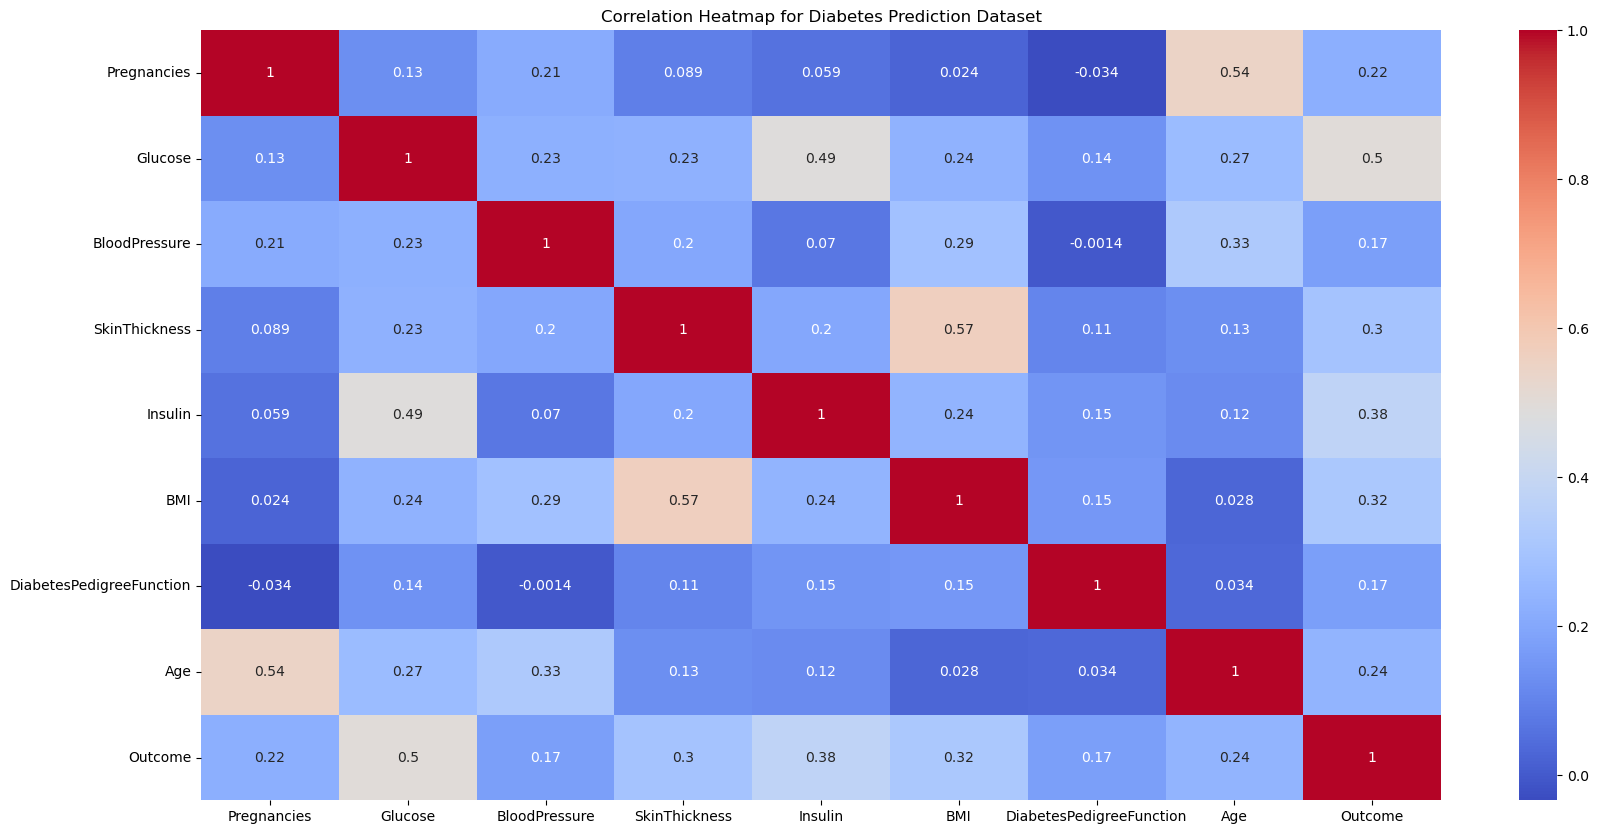

In [55]:
plt.figure(figsize=(20, 10))
sns.heatmap(diabetes_dataset.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap for Diabetes Prediction Dataset")
plt.show()

# SEPERATING DATA into FEATURES AND LABELS


In [56]:

X=diabetes_dataset.drop(columns='Outcome',axis=1) # 1 means columns
Y=diabetes_dataset['Outcome']

print(X.head()) # to see the first 5 rows of the data
print(Y.head()) # to see the first 5 rows of the labels

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    169.5  33.6   
1            1     85.0           66.0           29.0    102.5  26.6   
2            8    183.0           64.0           32.0    169.5  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


# DATA STANDARDIZATION
Standardize the data using StandardScaler


In [57]:

# WHY ->  HEPLS MODEL TO MAKE BETTER PREDICTION AS VALUE IN ONLY BETWEEN 0 AND 1

scaler =StandardScaler() # taking one instances of standardscaler function
scaler.fit(X) # fitting the data to the scaler

standardize_data=scaler.transform(X)
standardize_data

array([[ 0.63994726,  0.86462486, -0.03218035, ...,  0.16948251,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20472661, -0.52812374, ..., -0.84854874,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01426457, -0.69343821, ..., -1.32847775,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02224005, -0.03218035, ..., -0.90672195,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14199419, -1.02406713, ..., -0.33953311,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94195182, -0.19749482, ..., -0.2959032 ,
        -0.47378505, -0.87137393]])

In [58]:
# #standardize_data=scaler.fit_transform(X)   # for both in one line fit and tranform
# instead of doing in separate lines

In [59]:
X=standardize_data  # assigning standardize data to X again

In [60]:
X[0] 

array([ 0.63994726,  0.86462486, -0.03218035,  0.66518138,  0.31160394,
        0.16948251,  0.46849198,  1.4259954 ])

# FOR TRANING AND TESTING 

In [61]:
X_train , X_test ,Y_train ,Y_test=train_test_split(X,Y,test_size=0.3,random_state=2)
# X_train ,X_test spliting The data X into these two 
# Y_train ,Y_test splititng The data Y into these two 
# random_state = 2  for replicating code

In [62]:
print(X.shape,X_train.shape,X_test.shape)
print(Y.shape,Y_train.shape,Y_test.shape)

(768, 8) (537, 8) (231, 8)
(768,) (537,) (231,)


In [63]:
# for handling imbalance data 
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

In [64]:
model_params = {
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': [None, 5, 10],
            'criterion': ['gini', 'entropy']
        }
    },
    'logistic_reg': {
        'model': LogisticRegression(),
        'params': {
            'C': [0.1, 1, 10],
            'solver': ['liblinear']
        }
    },
    'knn': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7]
        }
    },
    'naive_bayes': {
        'model': GaussianNB(),
        'params': {}  
    }
}
# Store results
best_models = []
#key value pair 
for name, mp in model_params.items():
    #  use for training cv=> cross validation choose on the bses of accuracy 
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, scoring='accuracy')
    # fitiing the data on current model
    
    clf.fit(X_train, Y_train)

    best_models.append({
        'model': name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
        'final_model': clf.best_estimator_
    })
    print(f"{name} best CV accuracy: {clf.best_score_:.4f}")
    print(f"Best params: {clf.best_params_}\n")

decision_tree best CV accuracy: 0.8652
Best params: {'criterion': 'entropy', 'max_depth': None}

logistic_reg best CV accuracy: 0.7870
Best params: {'C': 0.1, 'solver': 'liblinear'}

knn best CV accuracy: 0.8449
Best params: {'n_neighbors': 5}

naive_bayes best CV accuracy: 0.7739
Best params: {}



In [65]:
best_model_info = max(best_models, key=lambda x: x['best_score'])
final_model = best_model_info['final_model']
best_model_info

{'model': 'decision_tree',
 'best_score': 0.8652173913043478,
 'best_params': {'criterion': 'entropy', 'max_depth': None},
 'final_model': DecisionTreeClassifier(criterion='entropy')}

# Evaluating The Model 


In [66]:
X_train_prediction =final_model.predict(X_train)
# comparing model prediction with original prediction
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)


In [67]:
print('Accuracy score of the training data :',training_data_accuracy*100)


Accuracy score of the training data : 100.0


# Find accuracy score of test data

In [68]:
X_test_prediction=final_model.predict(X_test)
training_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [69]:
print('Accuracy score of test data :',training_data_accuracy*100)
# there is no overtraining 
#  means accuracy score of training data is higher than accuracy score of test data 

Accuracy score of test data : 84.84848484848484


In [70]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(X_test_prediction,Y_test)
print('Confusion matrix : \n',cm)


cr=classification_report(X_test_prediction,Y_test)
print('Classification Report  :\n ',cr)

Confusion matrix : 
 [[139  19]
 [ 16  57]]
Classification Report  :
                precision    recall  f1-score   support

           0       0.90      0.88      0.89       158
           1       0.75      0.78      0.77        73

    accuracy                           0.85       231
   macro avg       0.82      0.83      0.83       231
weighted avg       0.85      0.85      0.85       231



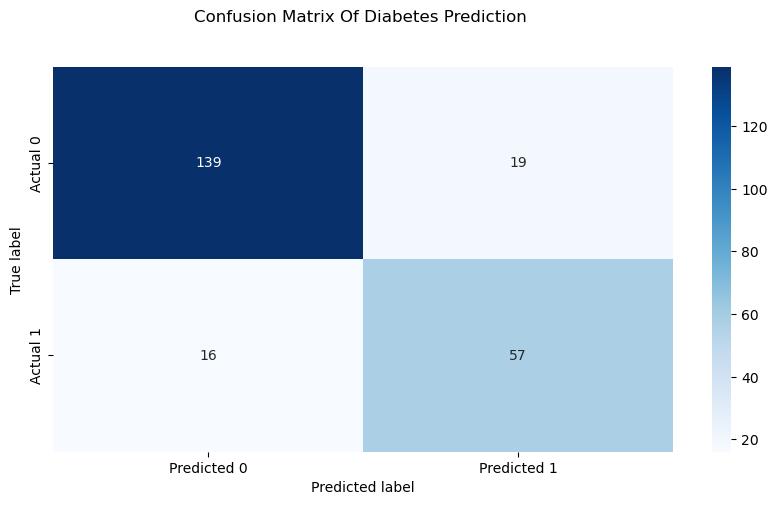

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import gridspec

# Create figure
plt.figure(figsize=(10, 5))
# Confusion Matrix
data_cm = cm
sns.heatmap(data_cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix Of Diabetes Prediction \n', pad=20)
plt.xlabel('Predicted label')
plt.ylabel('True label')


plt.show()

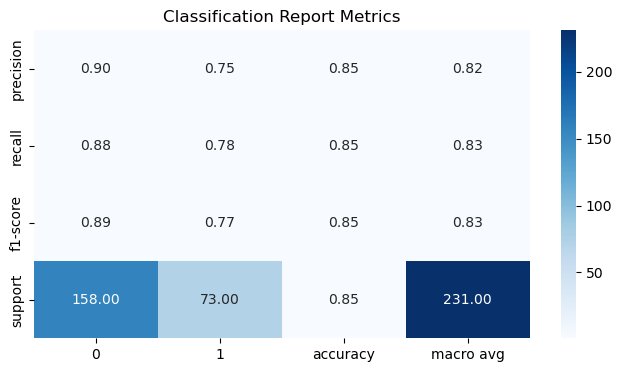

In [72]:

# Generate classification report
report = classification_report(X_test_prediction, Y_test, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Plot classification report
plt.figure(figsize=(8, 4))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap='Blues', fmt='.2f')
plt.title('Classification Report Metrics')
plt.show()



# Making predictive System

In [73]:
input_data=(6,148,72,35,0,33.6,0.627,50)

input_data=(1,85,66,29,0,26.6,0.351,31)
# change input data to numpy array

arr=np.asarray(input_data)

#reshape the array

input_data_reshape=arr.reshape(1,-1)


# Standardize the input data 

In [74]:
std_data=scaler.transform(input_data_reshape)

# print(std_data)

prediction=final_model.predict(std_data)

# print('Prediction : ',prediction)

if (prediction[0]==1):
    print('The Person is diabetic .')
else:
    print('The Person is not diabetic .')


The Person is not diabetic .


d:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [75]:
import pickle

In [76]:
filename='diabetes_model.sav'
pickle.dump(final_model,open(filename,'wb'))
pickle.dump(scaler,open("scaler.sav",'wb'))

In [77]:
# Loading the saved model
loaded_model=pickle.load(open('diabetes_model.sav','rb'))
loaded_model1=pickle.load(open('scaler.sav','rb'))

